In [1]:
%matplotlib inline
from random import randint
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.io import imread
from dataset_interface.coco import COCODataAPI

In [2]:
data_dir = '/run/media/minh/Data/WindowsLocations/Documents/data/coco'
config_file = '../config/sample_coco_configs.yml'
coco_api = COCODataAPI(data_dir, config_file)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


In [3]:
indoor_cat_names = coco_api.get_sub_category_names('indoor')
print(indoor_cat_names)

{84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}


In [4]:
images = coco_api.get_images_in_category('indoor')
keys = list(images.keys())                                                                                                                   
rand_image_ids = list(map(lambda _: keys[randint(0, len(keys))], range(10)))
image_with_book = images[154431]

In [5]:
print(image_with_book.image_path)
im = imread(image_with_book.image_path)

/run/media/minh/Data/WindowsLocations/Documents/data/coco/images/val2017/000000154431.jpg


In [6]:
def plot_category(image_id, category_name):
    boxes = coco_api.get_bounding_boxes_by_names(image_with_book.id, [category_name])
    boxes = boxes[coco_api.get_category_id(category_name)]

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)
    for box in boxes:
        # Create a Rectangle patch
        rect = patches.Rectangle((box['min_x'], box['min_y']), box['width'], box['height'],
                                 linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

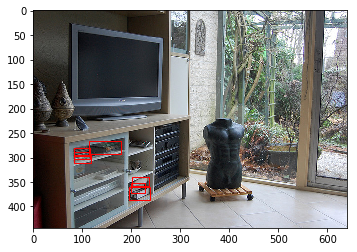

In [7]:
plot_category(image_with_book.id, 'book')

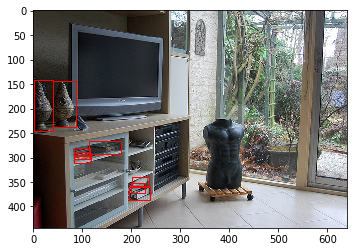

In [8]:
plot_category(image_with_book.id, 'indoor')